# #Number of movies with a rating greater than 7.5 per year

In [15]:
import pandas as pd
import nltk
df_film = pd.read_csv("Top_rated_movies.csv")
df_film.head()#Top_rated_films 

,title,year,certificate,runtime,genre,rating,text,director,stars,gross
0,The Trial of the Chicago 7,2020,NC16,129 min,"Drama, History, Thriller",7.9,The story of 7 people on trial stemming from v...,Aaron Sorkin,"Eddie Redmayne, Alex Sharp, Sacha Baron Cohen,...",NaN
1,Tenet,2020,PG13,150 min,"Action, Sci-Fi",7.8,"Armed with only one word, Tenet, and fighting ...",Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...",$45.10M
2,Clouds,2020,PG-13,121 min,"Drama, Music",7.5,Young musician Zach Sobiech discovers his canc...,Justin Baldoni,"Fin Argus, Neve Campbell, Sabrina Carpenter, M...",NaN
3,The Gentlemen,2019,M18,113 min,"Action, Comedy, Crime",7.9,An American expat tries to sell off his highly...,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle ...",NaN
4,Moneyball,2011,PG13,133 min,"Biography, Drama, Sport",7.6,Oakland A's general manager Billy Beane's succ...,Bennett Miller,"Brad Pitt, Robin Wright, Jonah Hill, Philip Se...",$75.61M


<AxesSubplot:>

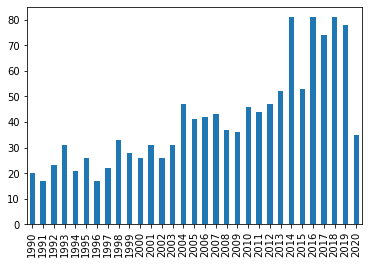

In [16]:
df_film = pd.read_csv("Top_rated_movies.csv")
year_count = df_film['year'].value_counts()
a = year_count.sort_index()#sorted by year
a.plot(kind = 'bar')


<AxesSubplot:>

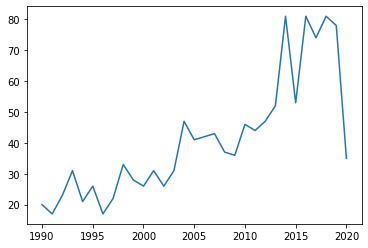

In [17]:
a.plot(kind = 'line')

# # Top six directors with high-rated movies

<AxesSubplot:>

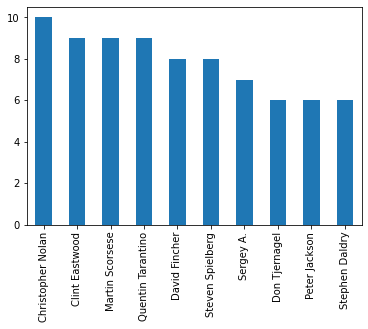

In [18]:
top_director = df_film.director.value_counts()[0:10]
top_director.plot(kind = 'bar')

# # the relationship between certificate and gross colunm

In [19]:
import re
for gross in df_film.gross:
    try:                     
        df_film.gross=df_film.gross.replace(gross,re.findall(r"\$(.*)M",gross)[0]) 
    except:
        pass

In [20]:
df_film.gross=df_film.gross.astype(float)

In [21]:
df_film.certificate.value_counts()[:5]

PG       282
M18      135
NC-16    124
PG13      79
R         60
Name: certificate, dtype: int64

In [22]:
r_gross_list=df_film[(df_film.certificate == "R")]['gross'].values.tolist()
pg_gross_list = df_film[(df_film.certificate == "PG")]['gross'].values.tolist()
m18_gross_list = df_film[(df_film.certificate == "M18")]['gross'].values.tolist()
pg13_gross_list = df_film[(df_film.certificate == "PG13")]['gross'].values.tolist()
nc16_gross_list = df_film[(df_film.certificate == "NC16")]['gross'].values.tolist()

In [23]:
data = {"PG":pg_gross_list,"M18":m18_gross_list,"PG13":pg13_gross_list,"R":r_gross_list}
a = {"PG":pg_gross_list}
b = {"M18":m18_gross_list}
c = {"PG13":pg13_gross_list}
d = {"NC16":nc16_gross_list}
e = {"R":r_gross_list}
df = pd.concat([pd.DataFrame(a), pd.DataFrame(b), pd.DataFrame(c),pd.DataFrame(d),pd.DataFrame(e)], axis=1)

               PG         M18        PG13        NC16           R
count  229.000000  115.000000   58.000000   25.000000   54.000000
mean   111.206026   43.095391  129.696379   61.667600   17.424815
std    146.858916   61.176696  166.069926   75.651343   29.251703
min      0.010000    0.000000    0.020000    0.040000    0.000000
25%      6.150000    1.870000   13.255000    5.900000    0.387500
50%     45.510000   19.590000   73.960000   45.060000    5.810000
75%    173.840000   56.060000  188.282500   85.820000   20.222500
max    936.660000  324.590000  858.370000  335.450000  121.460000


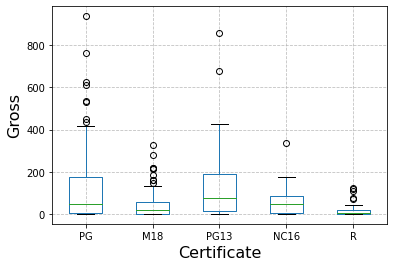

In [24]:
import matplotlib.pyplot as plt
df.plot.box()

plt.xlabel("Certificate",fontsize=16)
plt.ylabel('Gross',fontsize=16) 
plt.grid(linestyle="--", alpha=0.8)

print(df.describe())#Display the median, upper and lower quarter values, standard deviation, etc.

plt.show()

# Different Genres

In [25]:
df_film.genre.fillna("")

0       Drama, History, Thriller
1                 Action, Sci-Fi
2                   Drama, Music
3          Action, Comedy, Crime
4        Biography, Drama, Sport
                  ...           
1265                            
1266                            
1267                            
1268                            
1269                            
Name: genre, Length: 1270, dtype: object

In [26]:
genre_list = list()
for genre in df_film.genre:
    try:
        genre_list+=genre.split(", ")
    except:
        pass

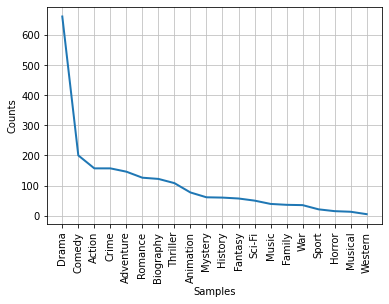

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
nltk.FreqDist(genre_list).plot()